# $\color{ForestGreen}{\text{Coding for Regression Analysis}}$

In [1]:
# Loading Boston housing dataset

from sklearn.datasets import load_boston

In [2]:
# Finding the description of the involved variables

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
# Defining a dataframe for the Boston housing dataset

import numpy as np
import pandas as pd

boston_df = pd.DataFrame(boston.data)       # Defining dataframe boston_df 
boston_df.columns = boston.feature_names    # Defining the headers of the dataframe
boston_df['PRICE'] = boston.target          # Adding Price column

boston_df.head()                            # Viewing the first few rows of dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


$\color{ForestGreen}{\text{Calculating Pearson Correlation between Variables}}$

Note that `CHAS` is a categorical variable, and we do not include it in the regression analysis. 

In [4]:
# Dropping 'CHAS' column

boston_df = boston_df.drop(['CHAS'], axis=1)

boston_df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


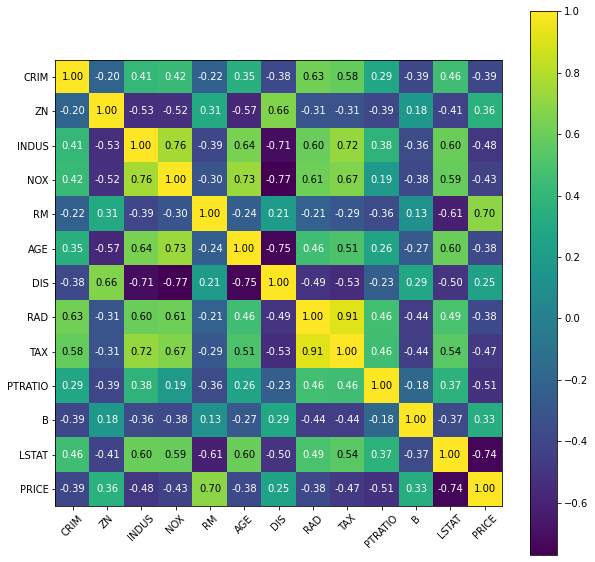

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns 
import mlxtend
from mlxtend.plotting import heatmap

cols = boston_df.columns     # List of colmuns of dataframe boston_df

cm = np.corrcoef(boston_df[cols].values.T)     # Calculate Pearson correlation
hm = heatmap(cm, figsize=(10,10), row_names=cols, column_names=cols)  # Represent correlation by a heat map
plt.show()

The above matrix shows that `LSTAT` and `RM` have the highest correlations with the target variable `PRICE`. Therefore, as our first step in our regression, we identify `LSTAT` and `RM` as the two features to explain the target `PRICE`. Now, let's check the Spearman correlation. This is a cross check to make sure that we have not missed any inluential variable (on `PRICE`) that Pearson correlation hasn't been able to detect.

In [6]:
# Calculate Spearman correlation coefficient between 'PRICE' and each feature 

from scipy.stats import spearmanr    # For Spearman correlation

for col in cols[:-1]:
    rho, p = spearmanr(boston_df[col].values, boston_df['PRICE'].values)
    print('Spearman correlation between PRICE and %s is %s' %(col, round(rho, 4)))

Spearman correlation between PRICE and CRIM is -0.5589
Spearman correlation between PRICE and ZN is 0.4382
Spearman correlation between PRICE and INDUS is -0.5783
Spearman correlation between PRICE and NOX is -0.5626
Spearman correlation between PRICE and RM is 0.6336
Spearman correlation between PRICE and AGE is -0.5476
Spearman correlation between PRICE and DIS is 0.4459
Spearman correlation between PRICE and RAD is -0.3468
Spearman correlation between PRICE and TAX is -0.5624
Spearman correlation between PRICE and PTRATIO is -0.5559
Spearman correlation between PRICE and B is 0.1857
Spearman correlation between PRICE and LSTAT is -0.8529


It is again observed that the dominant effect comes from the two variables `LSTAT` (with $\rho=-0.8529$) and `RM` (with $\rho=0.6336$). The Pearson and Spearman correlations agree on the role of the dominant variables.

$\color{ForestGreen}{\text{Defining the Variables of the Model}}$

In [7]:
# Defining the features and the target of the model

X = boston_df[['LSTAT', 'RM']]     # Features
y = boston_df.PRICE                # Target 

The linear model is now $y = \omega_1 X_1 + \omega_2 X_2 + \omega_0$, where $X_1$ and $X_2$ refer to `LSTAT` and `RM`, respectively. $\omega_1$ and $\omega_2$ are the coefficients of regression, and the constant $\omega_0$ is the intercept (*i.e.* bias term).

In [8]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

## $\color{ForestGreen}{\text{Performing Regression through }\textsf{scikit-learn}}$

In [9]:
# Importing 'LinearRegression' through linear_model module

from sklearn.linear_model import LinearRegression  

reg = LinearRegression()         # Instantiate
reg.fit(X_train, y_train)        # Fit the train data

r2_train_score = reg.score(X_train, y_train)   # Calculating R^2 score for train

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.6469 

Coefficients of Linear Model: [-0.6965145  4.8839348] 

Intercept: 0.79005520961854


In [10]:
# Finding the predictions of the model for test dataset

y_pred = reg.predict(X_test)

y_pred[:10]  # Representing the price prediction for the first 10 data points in test dataset

array([38.27709025, 22.14882389, 25.23733249, 31.50462753, 26.04502872,
       23.25264165, 19.60807021,  8.13929916, 25.19314285, 10.80728302])

In [11]:
# Evaluating the performance of the model on the test dataset

r2_test_score = reg.score(X_test, y_test)   # Calculating R^2 score for train

print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for test dataset =  0.6117 



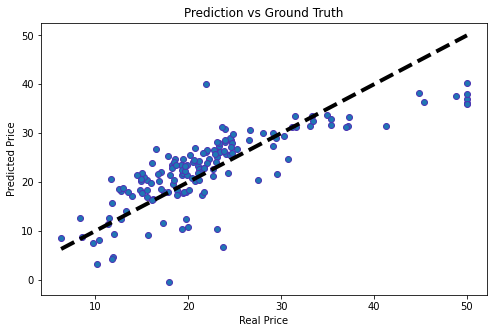

In [12]:
# Let's plot predictions vs ground truth for 'PRICE'

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real Price')
ax.set_ylabel('Predicted Price')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

The closer a point in above plot is to the $y=x$ line, the more realistic the prediction for the `PRICE` is. 

## $\color{ForestGreen}{\text{Performing Regression through }\textsf{StatsModels}}$

An alternative to $\textsf{scikit-learn}$ library is $\textsf{StatsModels}$. We now solve the same problem using $\textsf{StatsModels}$.

In [13]:
# Importing the statsmodels api

import statsmodels.api as sm

In [14]:
XC_train = sm.add_constant(X_train)     # Creating the bias term omega_0
model = sm.OLS(y_train, XC_train)       # Defining model and the data into the model
results = model.fit()                   # Fitting the data into the model

print('Summary:\n', results.summary())  # Printing the summary of results

Summary:
                             OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     321.5
Date:                Sat, 25 Jun 2022   Prob (F-statistic):           4.56e-80
Time:                        13:17:43   Log-Likelihood:                -1108.2
No. Observations:                 354   AIC:                             2222.
Df Residuals:                     351   BIC:                             2234.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7901      3.855      0.20

In [15]:
XC_test = sm.add_constant(X_test)      # Adding bias for the test set
y_pred_sm = results.predict(XC_test)   # Finding the predictions for the test set

print(y_pred_sm.values[:10], '\n')     # Printing the predictions for the test set

# Let us compare the predictions of StatsModels with Scikit-learn

rd_array = np.vectorize(round)                            # Rounding numpy arrays
print(rd_array(y_pred[:20] - y_pred_sm.values[:20], 6))   # Subtract predictions of StatModels from Scikit-learn

[38.27709025 22.14882389 25.23733249 31.50462753 26.04502872 23.25264165
 19.60807021  8.13929916 25.19314285 10.80728302] 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


The above results show that the predictions of the $\textsf{StatsModels}$ are in perfect agreement with those of $\textsf{scikit-learn}$, as they should!

## $\color{ForestGreen}{\text{Performing Regression using the Exact Formula}}$

As you noticed, this dataset is not that big in size. Hence, we may find the *exact result* of regression through the exact formula we derived in the lecture: $\omega^{\mathsf{T}}=\big(\mathbb{X}^{\mathsf{T}}\mathbb{X}\big)^{-1}\,\mathbb{X}^{\mathsf{T}}\mathbb{Y}$. We can easily implement this formula into code using $\textsf{numpy}$.

In [16]:
# Defining a function to calculate omega from X and Y

from numpy.linalg import inv     # Import 'inv' to calculate inverse matrix

def exact_reg(X, Y):
    X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)               # Adding a column of 1's
    OmegaT = np.matmul(inv(np.matmul(X.T, X)), np.matmul(X.T, Y))  # Using the exact formula
    Y_hat = np.matmul(X, OmegaT)                                   # Predicted values of y
    return OmegaT, Y_hat

In [17]:
# Let's compare the exact results for coefficients and intercept with the results of scikit-learn

print('The intercept and coefficients from exact formula:', exact_reg(X_train.values, y_train.values)[0],'\n')

print('The intercept and coefficients from scikit-learn:', np.insert(reg.coef_, 0, reg.intercept_))

The intercept and coefficients from exact formula: [ 0.79005521 -0.6965145   4.8839348 ] 

The intercept and coefficients from scikit-learn: [ 0.79005521 -0.6965145   4.8839348 ]


In [18]:
# Calculate the exact R^2 scores

y_hat_train = exact_reg(X_train.values, y_train.values)[1]    # Calculating predictions for train data
y_hat_test = exact_reg(X_test.values, y_test.values)[1]       # Calculating predictions for test data

from sklearn.metrics import r2_score                          # Importing r2_score from metrics module

print('Exact train R^2 score = ', round(r2_score(y_train.values, y_hat_train), 6), '\n')
print('Exact test R^2 score = ', round(r2_score(y_test.values, y_hat_test), 6))

Exact train R^2 score =  0.646888 

Exact test R^2 score =  0.629446


The above $R^2$ scores are in perfect agreement with those obtained by $\textsf{scikit-learn}$!